In [1]:
import pandas as pd
import sqlite3


In [2]:
conn = sqlite3.connect('factbook.db')
query = "select * from sqlite_master WHERE type='table';"
pd.read_sql_query(query, conn)

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


In [3]:
query_five = 'select * from facts limit 5'
#five_results = conn.execute(query_five).fetchmany(5)
#print(five_results)
pd.read_sql_query(query_five, conn)


,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


**Summary Statistics**

In [4]:
query_stat = 'select MIN(population), MAX(population), MIN(population_growth), MAX(population_growth) from facts'
pd.read_sql_query(query_stat, conn)

,MIN(population),MAX(population),MIN(population_growth),MAX(population_growth)
0,0,7256490011,0.0,4.02


**Exploring Outliers**

In [8]:
query_zero='select * from facts where population = 0'
pd.read_sql_query(query_zero, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,250,ay,Antarctica,None,280000,None,0,None,None,None,None


In [9]:
query_zero='select * from facts where population = 7256490011'
pd.read_sql_query(query_zero, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,261,xx,World,None,None,None,7256490011,1.08,18.6,7.8,None


In [25]:
query_hist = '''select population, population_growth, birth_rate, death_rate 
                from facts 
                where population != (select MIN(population) from facts)
                and population != (select MAX(population) from facts)'''
pop = pd.read_sql_query(query_hist, conn)
pop

,population,population_growth,birth_rate,death_rate
0,32564342,2.32,38.57,13.89
1,3029278,0.30,12.92,6.58
2,39542166,1.84,23.67,4.31
3,85580,0.12,8.13,6.96
4,19625353,2.78,38.78,11.49
5,92436,1.24,15.85,5.69
6,43431886,0.93,16.64,7.33
7,3056382,0.15,13.61,9.34
8,22751014,1.07,12.15,7.14
9,8665550,0.55,9.41,9.42


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fed99ec38d0>,
      dtype=object)

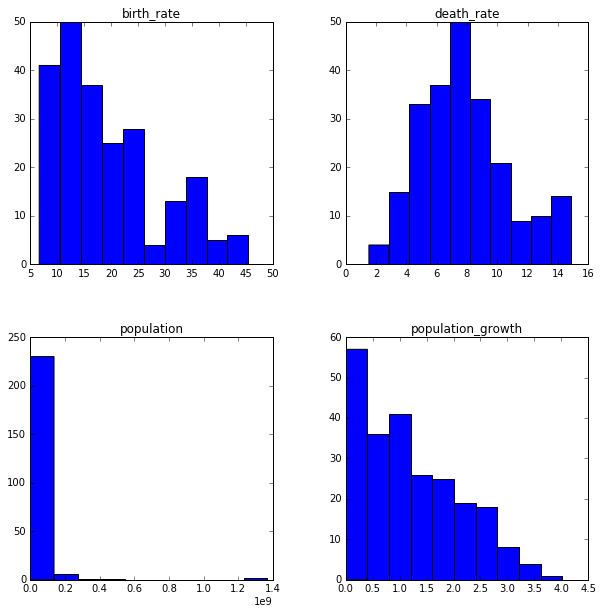

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

axis = [ax1, ax2, ax3, ax4]

pop.hist(ax=axis, grid=False)


**Further questions to explore:  
-Which countries have the highest population density? (Population density is the ratio of population to land area)    
-Generate a histogram of population densities.  
-Which countries have the highest ratios of water to land? Which countries have more water than land?  
**

In [53]:
#Which countries have the highest population density?

query_den = '''select name, population/area as density
               from facts
               where density != 0
               order by density desc
               
                
'''
density = pd.read_sql_query(query_den, conn)
density

,name,density
0,Macau,21168
1,Monaco,15267
2,Singapore,8141
3,Hong Kong,6445
4,Gaza Strip,5191
5,Gibraltar,4876
6,Bahrain,1771
7,Maldives,1319
8,Malta,1310
9,Bermuda,1299


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fed99c4f240>],
      dtype=object)

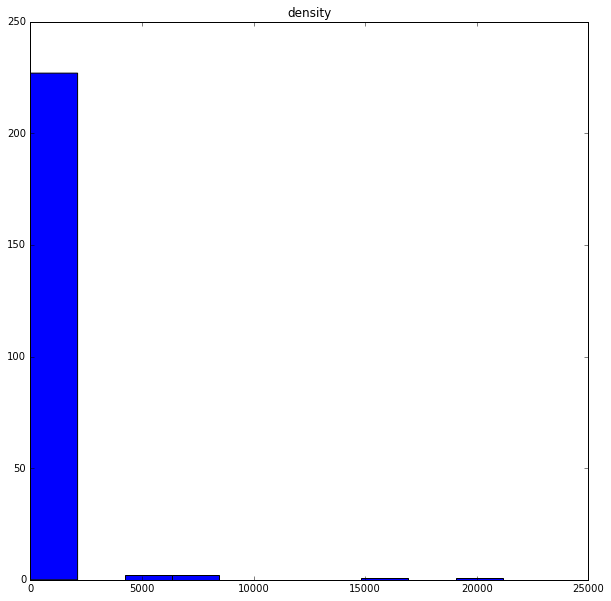

In [55]:
#Create a histogram of population densities

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
density.hist(ax=ax, grid=False)

In [60]:
#Which countries have the highest ratios of water to land?

wl = '''select name, area_water/area_land as wl
        from facts
        where wl != 0
'''
water_land = pd.read_sql_query(wl, conn)
water_land

,name,wl
0,British Indian Ocean Territory,905
1,Virgin Islands,4


In [62]:
water_more_land = '''select name
                     from facts
                     where area_water > area_land
'''
more_water = pd.read_sql_query(water_more_land, conn)
more_water

,name
0,British Indian Ocean Territory
1,Virgin Islands


* **British Indian Ocean Territory** and **Virgin Islands** are places where the area of water is bigger than the area of land. 